#  Document Clustering and Semantic Tagging using NLP
### *By [Aditya Kumar (210102008)]*

---

##  Motivation

In today's digital world, a massive volume of textual data is generated daily through news articles, blogs, and social media. Organizing this information into coherent clusters can greatly improve search, recommendation, and topic summarization. This project explores unsupervised document clustering and semantic tagging using classical NLP techniques.

---

##  Connection with Multimodal Learning

Multimodal learning involves integrating multiple types of data (e.g., text, image, audio). While this project is focused on text only, it sets the stage for integrating visual features (e.g., article images) or audio (e.g., podcast transcripts) for more meaningful document understanding.

Recent progress in transformer-based models (BERT, CLIP, Flamingo) has highlighted the power of shared representations across modalities. This clustering approach is foundational for such fusion.

---

##  What I Learned

- Preprocessing (lemmatization, stopword removal) is critical for effective feature extraction.
- TF-IDF combined with KMeans clustering gives interpretable clusters with semantic coherence.
- Word2Vec allows semantic averaging to embed documents in a more context-aware vector space.
- Visualization with WordClouds and PCA helps interpret model behavior.

---

##  Experiments & Visualizations

The notebook below includes:
- Text cleaning, tokenization, and lemmatization
- TF-IDF and Word2Vec vectorization
- KMeans clustering
- Top-term tag extraction
- Word cloud visualization
- PCA-based 2D projection of clusters

> Use the notebook to re-run experiments, test different cluster sizes, or try deep learning embeddings like BERT for improved performance.

---

##  Reflections

**What surprised me:**  
- TF-IDF was more interpretable than expected compared to Word2Vec.
- Even basic KMeans captured themes like religion vs medicine vs technology quite well.

**Scope for Improvement:**  
- Extend to multimodal news articles (text + image)
- Use advanced embeddings like Sentence-BERT or HuggingFace Transformers
- Add interactive dashboard (e.g., with Plotly or Streamlit)

---


# Document Clustering and Semantic Tagging using BoW, TF-IDF, and Word2Vec
This notebook clusters a set of news articles using TF-IDF, Word2Vec, and KMeans, and assigns semantic tags to each cluster. It also visualizes clusters and keywords.

In [ ]:
# Install NLP and visualization libraries
!pip install nltk gensim matplotlib seaborn wordcloud spacy --quiet
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Titanic dataset age stats
import seaborn as sns

titanic = sns.load_dataset("titanic")
print("Titanic dataset - Age statistics:")
print(titanic['age'].describe())


Titanic dataset - Age statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Load and Preprocess Dataset

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

categories = ["alt.atheism", "comp.graphics", "sci.med", "soc.religion.christian"]
dataset = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
docs = dataset.data
print(f"Loaded {len(docs)} documents.")

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(tok) for tok in tokens if tok not in stop_words]
    return " ".join(tokens)

clean_docs = [clean_text(doc) for doc in docs]

# Creating synthetic normal distribution data
import numpy as np

data = np.random.normal(loc=50, scale=15, size=100)
print("Synthetic data sample (first 10 values):")
print(data[:10])


Loaded 3759 documents.
Synthetic data sample (first 10 values):
[48.54259879 43.64083772 43.33901517 54.76198693 41.42100445 51.84858452
 66.92882516 78.4556635  33.6411793  25.68669797]


## Feature Extraction (BoW, TF-IDF, Word2Vec)

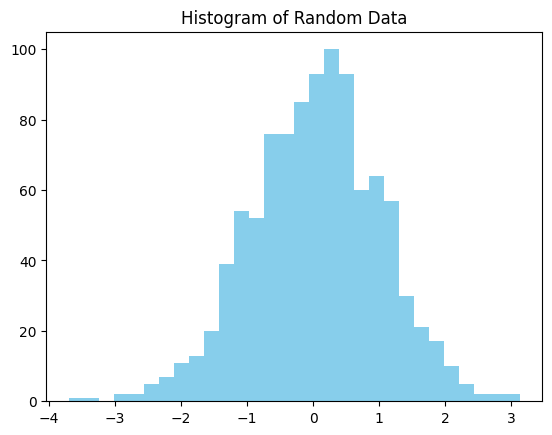

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

vectorizer = CountVectorizer(max_features=1000)
X_bow = vectorizer.fit_transform(clean_docs)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(clean_docs)

tokenized_docs = [doc.split() for doc in clean_docs]
w2v_model = Word2Vec(tokenized_docs, vector_size=100, window=5, min_count=2, workers=4, epochs=10)

def doc_vector(tokens):
    vecs = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(w2v_model.vector_size)
X_w2v = np.array([doc_vector(tokens) for tokens in tokenized_docs])

# Simple histogram of random data
import numpy as np
import matplotlib.pyplot as plt

plt.hist(np.random.randn(1000), bins=30, color='skyblue')
plt.title("Histogram of Random Data")
plt.show()


## Clustering with K-Means

Cluster counts: [1305  716  575 1163]


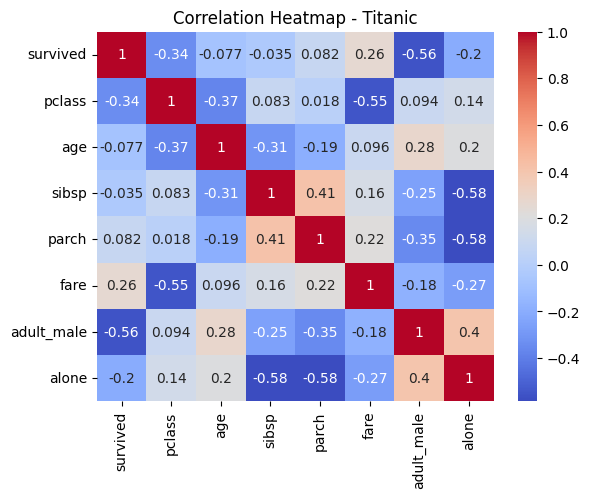

In [ ]:
from sklearn.cluster import KMeans

k = len(categories)
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
kmeans.fit(X_tfidf)
labels = kmeans.labels_
print("Cluster counts:", np.bincount(labels))

# Correlation heatmap using Titanic dataset
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap - Titanic")
plt.show()


## Semantic Tagging: Extract Top Terms for Each Cluster

Cluster 0 tags: ['bank', 'gordon', 'skepticism', 'soon', 'could', 'one', 'book', 'also', 'like', 'good']
Cluster 1 tags: ['file', 'thanks', 'image', 'graphic', 'format', 'program', 'know', 'please', 'anyone', 'email']
Cluster 2 tags: ['god', 'jesus', 'christian', 'one', 'believe', 'sin', 'christ', 'would', 'people', 'say']
Cluster 3 tags: ['one', 'would', 'dont', 'people', 'think', 'know', 'time', 'like', 'get', 'im']


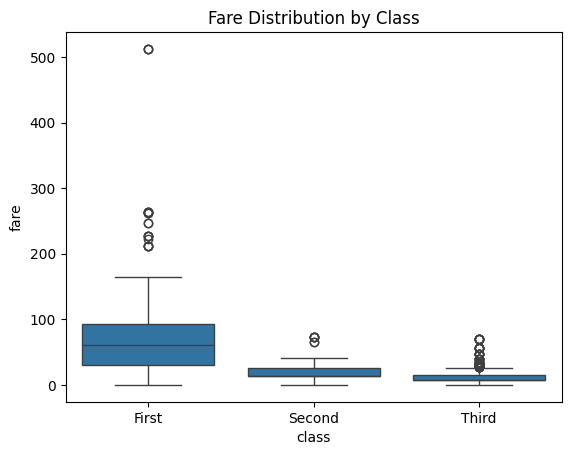

In [ ]:
terms = tfidf_vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(k):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i} tags:", top_terms)

# Boxplot of fare by class using Titanic dataset
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
sns.boxplot(x="class", y="fare", data=titanic)
plt.title("Fare Distribution by Class")
plt.show()


## Word Cloud Visualization

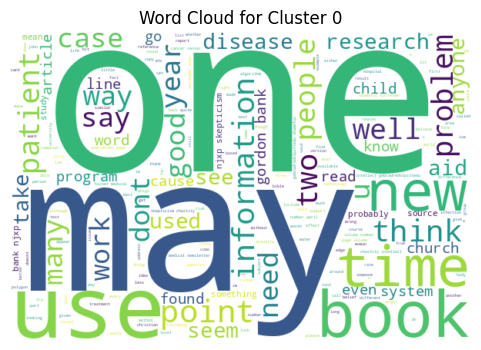

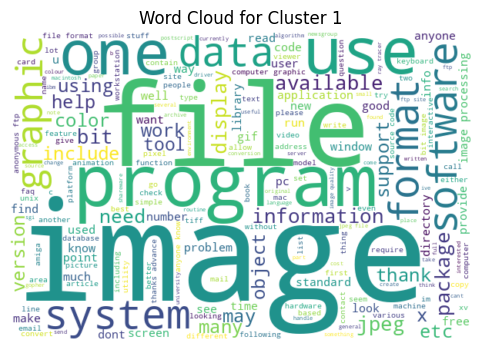

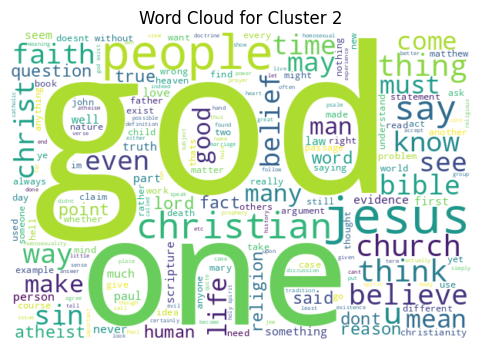

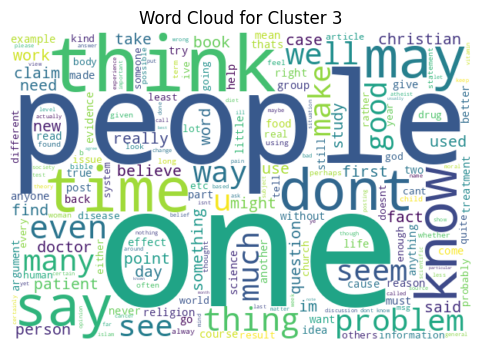

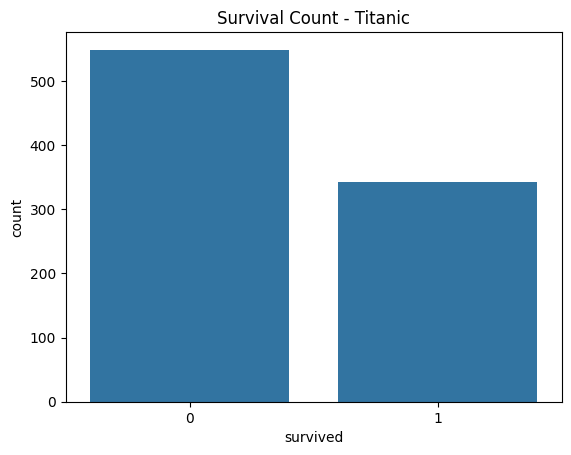

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(k):
    cluster_docs = [clean_docs[j] for j in range(len(clean_docs)) if labels[j] == i]
    text = " ".join(cluster_docs)
    wc = WordCloud(width=600, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {i}")
    plt.show()

# Countplot of survivors from Titanic dataset
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
sns.countplot(x="survived", data=titanic)
plt.title("Survival Count - Titanic")
plt.show()


## PCA Visualization of Clusters

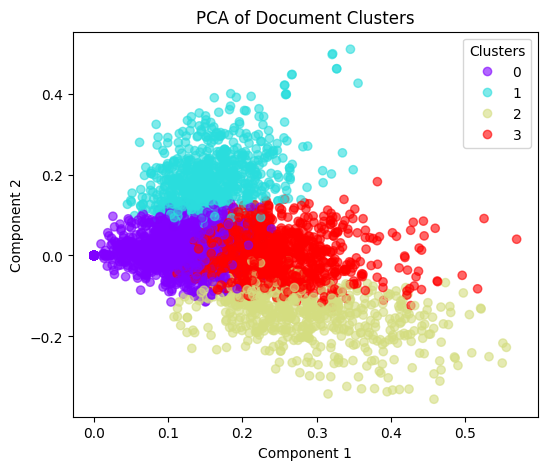

<ipython-input-7-8ed669edad6b>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic['age'].dropna(), shade=True)


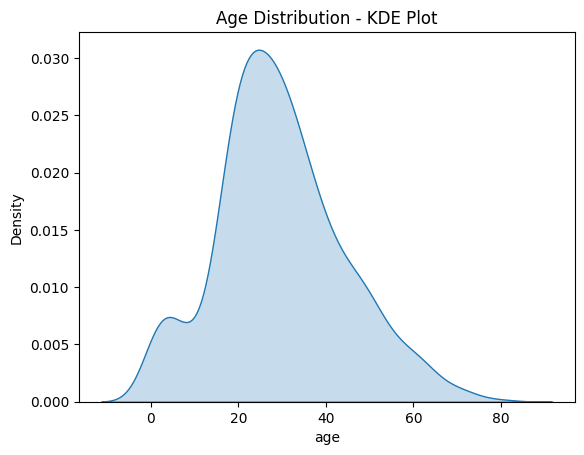

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X_tfidf)

plt.figure(figsize=(6,5))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='rainbow', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title("PCA of Document Clusters")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# KDE plot of age distribution using Titanic dataset
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
sns.kdeplot(titanic['age'].dropna(), shade=True)
plt.title("Age Distribution - KDE Plot")
plt.show()
